In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
network_training = pd.read_csv("UNSW_NB15_training-set.csv")
network_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [11]:
network_training.describe(include = "all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


In [14]:
corr = network_training.corr(numeric_only=True) # data frame correlation function
print(corr)

                         id       dur     spkts     dpkts    sbytes    dbytes  \
id                 1.000000  0.016037 -0.020766 -0.037020 -0.005647 -0.031115   
dur                0.016037  1.000000  0.280239  0.217507  0.225432  0.172492   
spkts             -0.020766  0.280239  1.000000  0.369554  0.965750  0.198324   
dpkts             -0.037020  0.217507  0.369554  1.000000  0.175834  0.976419   
sbytes            -0.005647  0.225432  0.965750  0.175834  1.000000  0.010036   
dbytes            -0.031115  0.172492  0.198324  0.976419  0.010036  1.000000   
rate              -0.121700 -0.118031 -0.068249 -0.083173 -0.025102 -0.047978   
sttl               0.095939 -0.000986 -0.092536 -0.163830 -0.017866 -0.114537   
dttl               0.306539  0.090048  0.054601  0.036483  0.049891  0.012537   
sload             -0.003063 -0.076343 -0.044194 -0.054145 -0.015228 -0.031266   
dload             -0.106562 -0.047032  0.074440  0.133835 -0.006428  0.100923   
sloss             -0.006852 

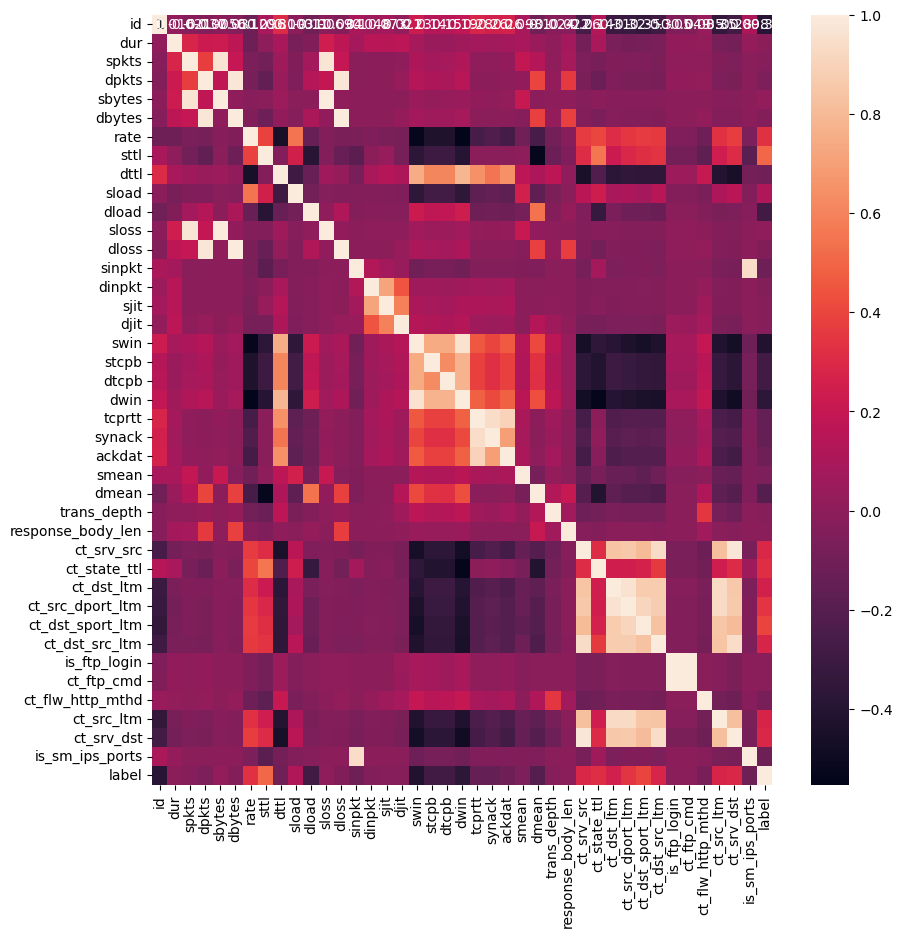

In [18]:
plt.figure(figsize = (10,10))

sns.heatmap(corr, annot=True)
plt.show()

In [37]:
print(pd.get_dummies(network_training['proto']))

         3pc    a/n  aes-sp3-d    any  argus   aris    arp  ax.25  bbn-rcc  \
0      False  False      False  False  False  False  False  False    False   
1      False  False      False  False  False  False  False  False    False   
2      False  False      False  False  False  False  False  False    False   
3      False  False      False  False  False  False  False  False    False   
4      False  False      False  False  False  False  False  False    False   
...      ...    ...        ...    ...    ...    ...    ...    ...      ...   
82327  False  False      False  False  False  False  False  False    False   
82328  False  False      False  False  False  False  False  False    False   
82329  False  False      False  False  False  False   True  False    False   
82330  False  False      False  False  False  False   True  False    False   
82331  False  False      False  False  False  False  False  False    False   

         bna  ...   visa   vmtp   vrrp  wb-expak  wb-mon    wsn

In [38]:
print(pd.get_dummies(network_training['service']))

          -   dhcp    dns    ftp  ftp-data   http    irc   pop3  radius  \
0      True  False  False  False     False  False  False  False   False   
1      True  False  False  False     False  False  False  False   False   
2      True  False  False  False     False  False  False  False   False   
3      True  False  False  False     False  False  False  False   False   
4      True  False  False  False     False  False  False  False   False   
...     ...    ...    ...    ...       ...    ...    ...    ...     ...   
82327  True  False  False  False     False  False  False  False   False   
82328  True  False  False  False     False  False  False  False   False   
82329  True  False  False  False     False  False  False  False   False   
82330  True  False  False  False     False  False  False  False   False   
82331  True  False  False  False     False  False  False  False   False   

        smtp   snmp    ssh    ssl  
0      False  False  False  False  
1      False  False  False 

In [39]:
print(pd.get_dummies(network_training['state']))

         ACC    CLO    CON    FIN    INT    REQ    RST
0      False  False  False  False   True  False  False
1      False  False  False  False   True  False  False
2      False  False  False  False   True  False  False
3      False  False  False  False   True  False  False
4      False  False  False  False   True  False  False
...      ...    ...    ...    ...    ...    ...    ...
82327  False  False  False  False   True  False  False
82328  False  False  False   True  False  False  False
82329  False  False  False  False   True  False  False
82330  False  False  False  False   True  False  False
82331  False  False  False  False   True  False  False

[82332 rows x 7 columns]


In [40]:
print(pd.get_dummies(network_training['attack_cat']))

       Analysis  Backdoor    DoS  Exploits  Fuzzers  Generic  Normal  \
0         False     False  False     False    False    False    True   
1         False     False  False     False    False    False    True   
2         False     False  False     False    False    False    True   
3         False     False  False     False    False    False    True   
4         False     False  False     False    False    False    True   
...         ...       ...    ...       ...      ...      ...     ...   
82327     False     False  False     False    False    False    True   
82328     False     False  False     False    False    False    True   
82329     False     False  False     False    False    False    True   
82330     False     False  False     False    False    False    True   
82331     False     False  False     False    False    False    True   

       Reconnaissance  Shellcode  Worms  
0               False      False  False  
1               False      False  False  
2        